# EAS 4610 - Earth Systems Modeling - Final Project
## Atmospheric/Shallow Water Gravity Waves
### By: Carson Clements, Kate Breeden
### Due: Tuesday, December 6th
### Requirements/Rubric: https://gatech.instructure.com/courses/261984/assignments/1234642
### Original Paper (Internal Gravity Waves in the Atmosphere): https://reader.elsevier.com/reader/sd/pii/S007461420480041X?token=0857787B8B9E9271C8A60B92489BEFF2C13E45CB9E82B096A270BAF36C9140939E1555793F0E0CF14F4AF85AECACF9A9&originRegion=us-east-1&originCreation=20221129172936

# Introduction
Paper: Internal gravity waves in the atmosphere (Holton Ch. 7)

This paper covers linear perturbation theory, a subject within atmospheric oscillations. Linear perturbation theory helps scientists gain physical insight into the fundamental nature of atmospheric motions by being able to examine several types of pure waves. These waves are very integral in transporting energy and momentum within the atmosphere, so understanding the linear perturbation theory will assist those who know it with understanding how pure atmospheric waves will impact weather. Other scientists may use 3D linear stability analysis based on Floquet theory to analyze internal gravity waves.

Wave motions are oscillations in field variables, like pressure and velocity, that spread through time and space. Our models are concerned with linear sinusoidal wave motions, where the period is independent of the amplitude. 

Representations of perturbations are simple sinusoidal waves, which may seem like an oversimplification at first as disturbances in the atmosphere are very rarely purely sinusoidal. However, most functions of longitude can be accurately depicted in terms of a zonal average plus a Fourier series of sinusoidal components.

Atmospheric waves transport energy and mix the air. Atmospheric waves can be caused by gravitational or solar heating forces, among many other forces. Types of atmospheric waves include Rossby waves, buoyancy waves, inertial waves, and topographic waves. The simplest atmospheric waves are sinusoidal oscillations that satisfy linearized forms of several dynamical equations. The dynamical equations are linearized by dividing all field methods into the basic state and perturbation portions, discussed below. 

The perturbation method is a mathematical method used for qualitative analysis of atmospheric waves. Perturbation method can be used to analyze multiple types of atmospheric waves. In perturbation method, all field variables are divided into two parts:
Basic state portion: Variables independent of time and longitude. They are assumed to be an east-west flow.
Perturbation portion: The local oscillatory deviation of the field from the basic state, assumed to be small. 

Perturbation theory comes with several assumptions that hold true for all cases. The first is that the basic state variables must satisfy governing equations when perturbations are at a value of zero. Additionally, perturbations fields have to be so miniscule that all the terms involving products of the perturbations in the governing equations can be neglected entirely.

# Equations

So, if u (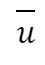) is a time and longitude averaged zonal velocity value, and u' is the local deviation from that average, the zonal velocity field would be written as u(x,t) = u(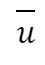)+u'(x,t).

So, inertial acceleration can be written as: 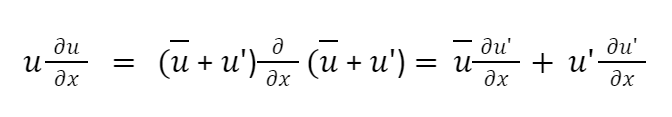

The assumptions of the perturbation theory will be met in the example above as long as: 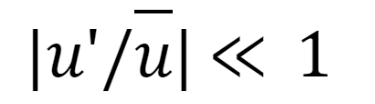

so that: 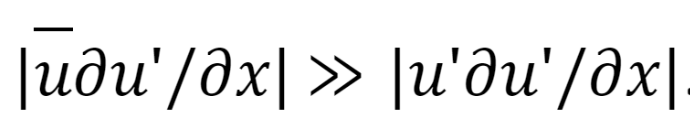

If the terms that are products of the perturbation variables are successfully neglected, the nonlinear governing equations will become linear differential equations in the perturbation variables. In this case, the basic state variables are specified coefficients. The linear differential equations can then be solved by standard mathematical practices to get the structure and character of the perturbations in terms of the given basic state. For equations with constant coefficients, the solutions will be sinusoidal or exponential in character. Characteristics such as propagation speed, vertical structure, and conditions for growth and decay of the given atmospheric waves are determined by the solutions of the perturbation equations.

Fourier series of sinusoidal components: 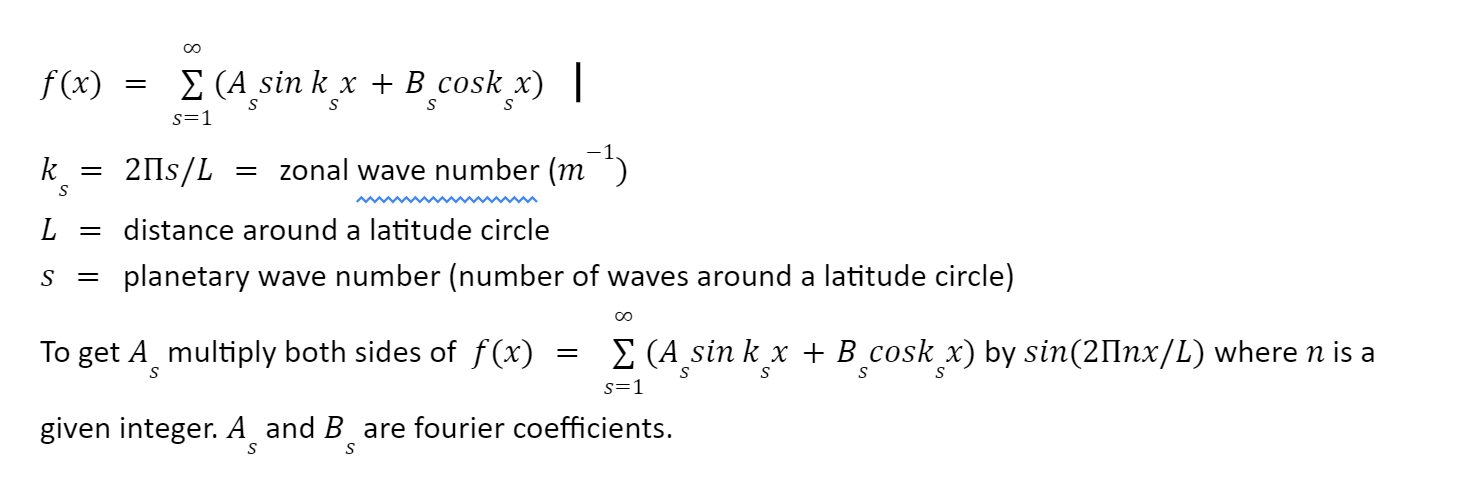

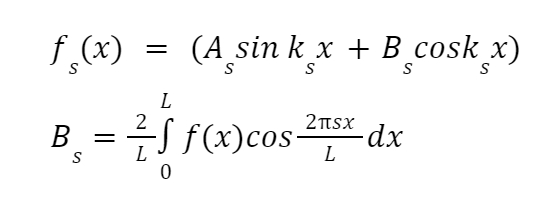
For the qualitative analysis that we are doing, usually it is sufficient to limit the analysis to one fourier component, assuming the behavior of the actual field will be similar to that of the chosen component.

According to the Euler formula, this is the expression for a fourier component using complex exponential notation:

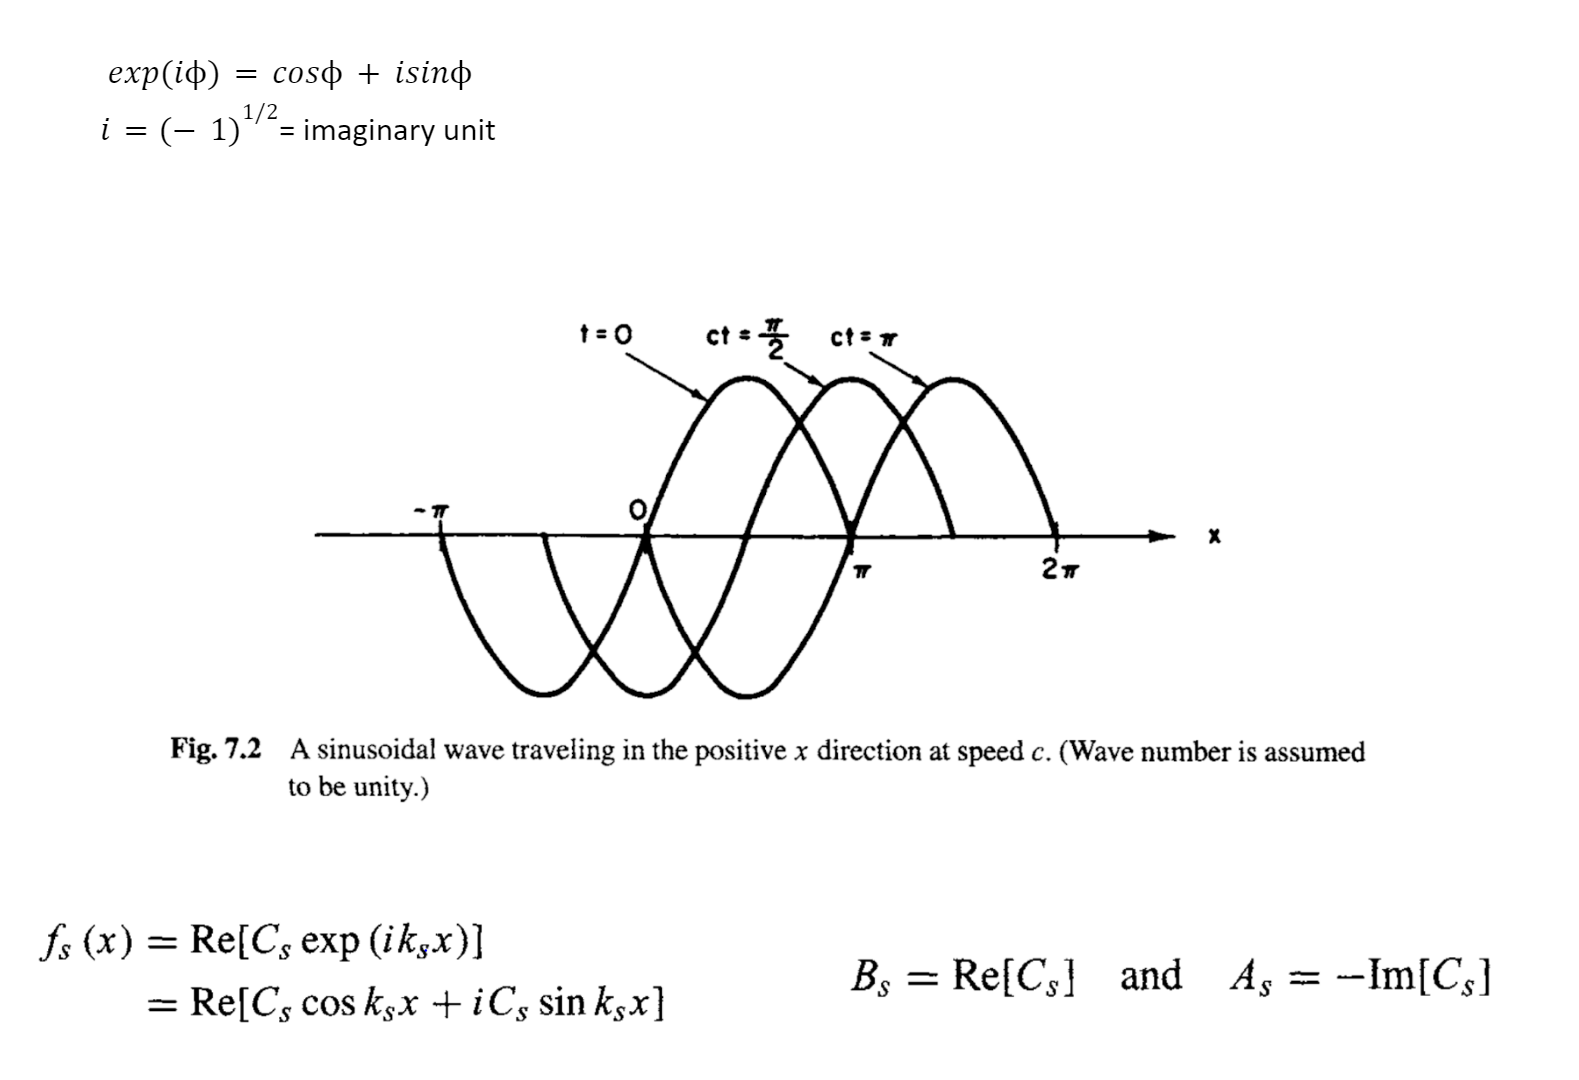
The frequency of oscillation (v) of a linear oscillator only depends on the physical characteristics of the oscillator, instead of the motion itself. This case is different for propagating waves, where (v) depends on the wave number of the perturbation, and the physical properties of the medium. c = v/k Phase speed depends on the wave number, except when:

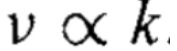
(That is a dispersion relationship.) For waves were phase speed changes with k, all the sinusoidal components of a disturbance from one specific location are dispersed. These are called dispersive waves. If the wave’s phase speeds are independent of the wave number, the wave is a nondispersive wave. Nondispersive waves have a spatially localized disturbance containing Fourier wave components and keep their original shape through propagation through space. Nondispersive waves propagate through space at the phase speed. Dispersive waves’ shapes do not remain constant through propagation. Individual wave components can move faster or slower than the average phase speed of the individual Fourier components. In atmospheric disturbances, the group velocity will exceed the phase velocity.

(Group velocity: The velocity where the disturbance propagates)

The Total Disturbance:
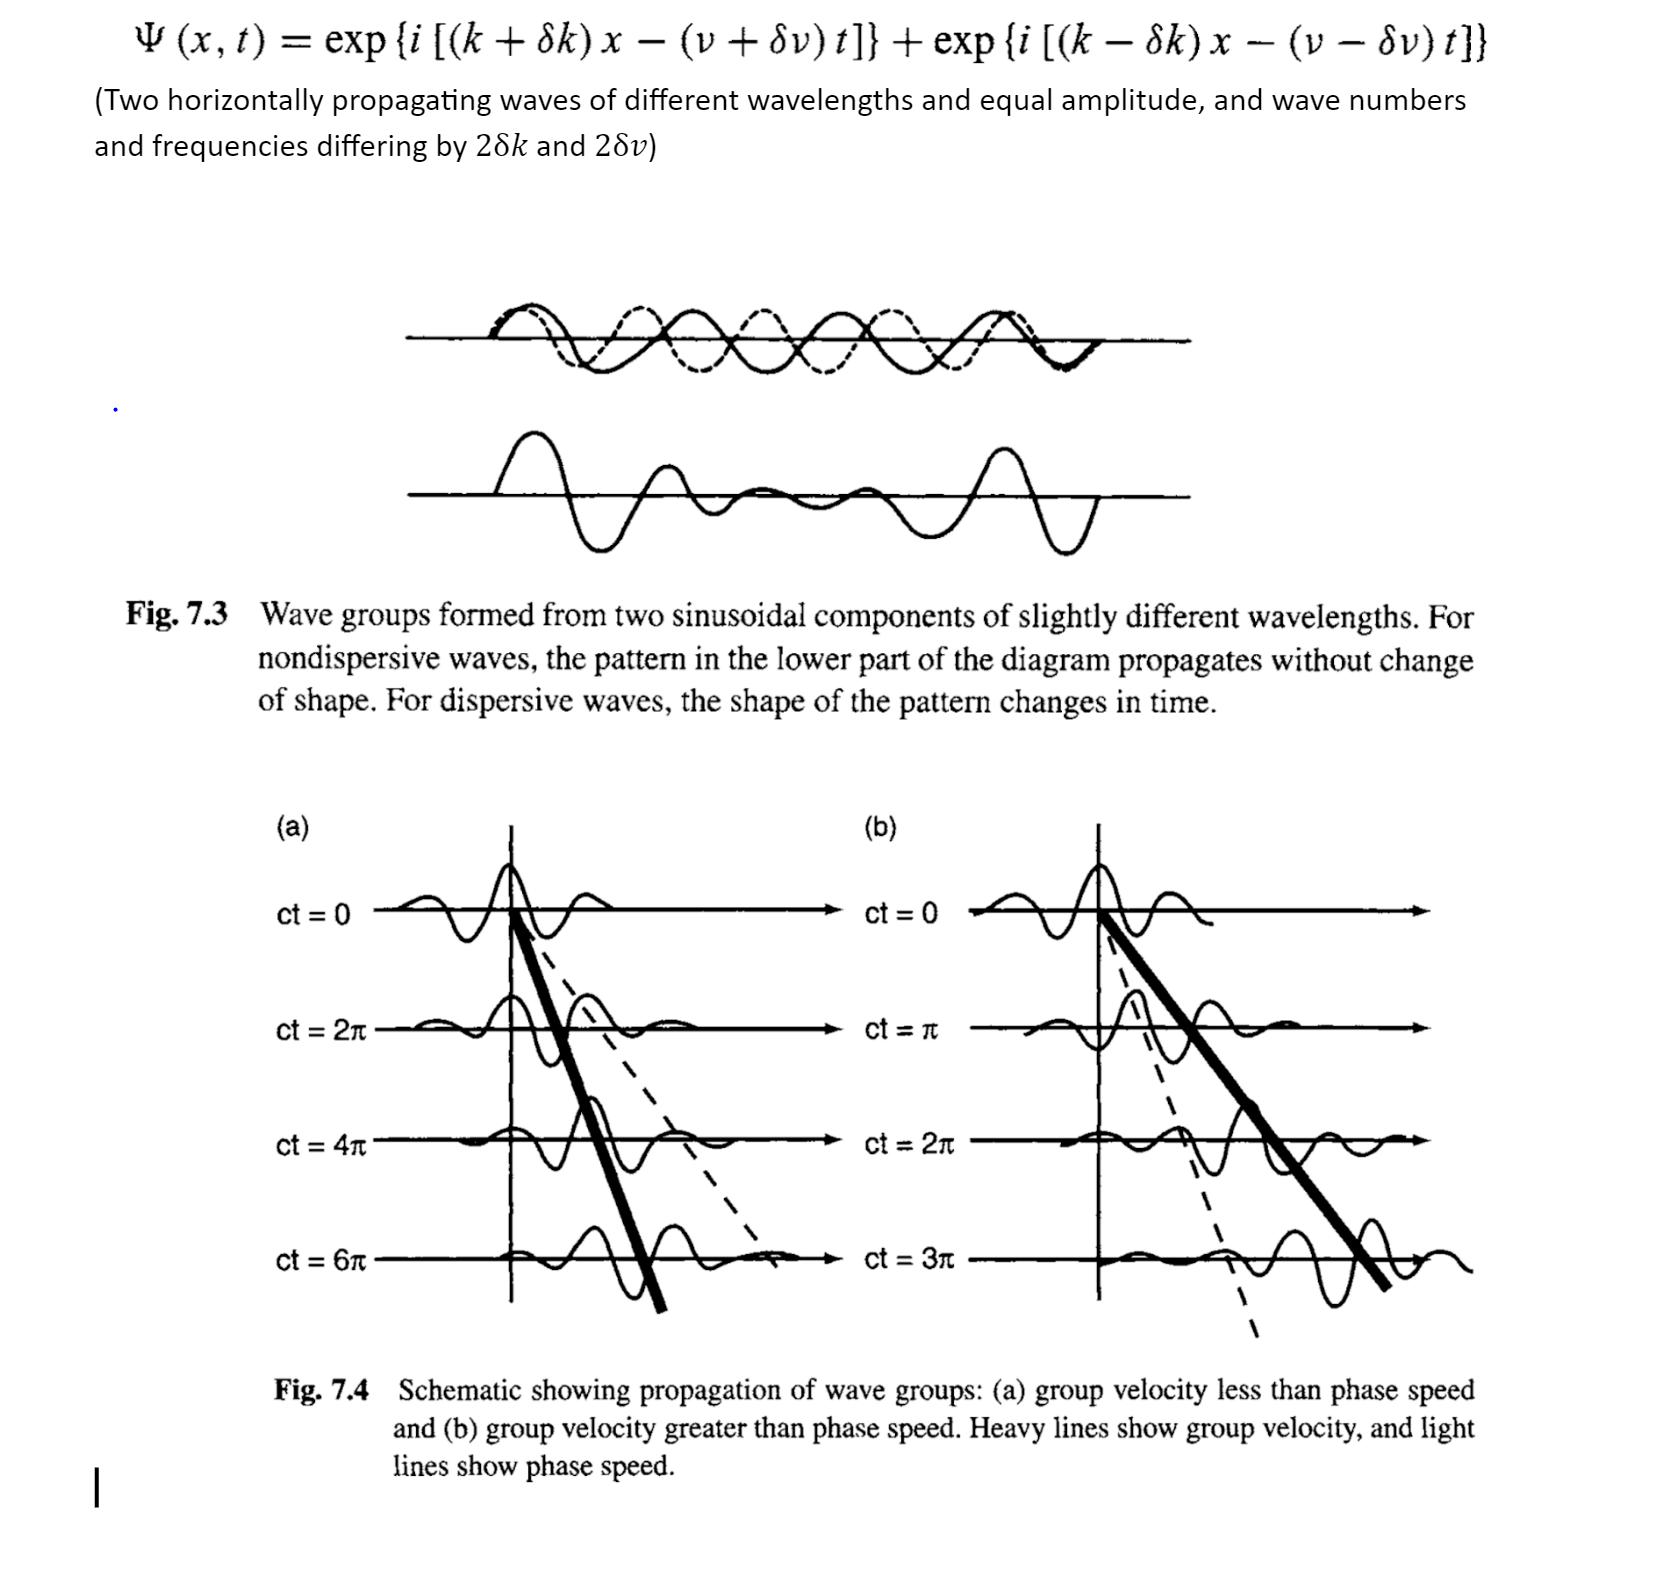
And after applying the Euler Formula...

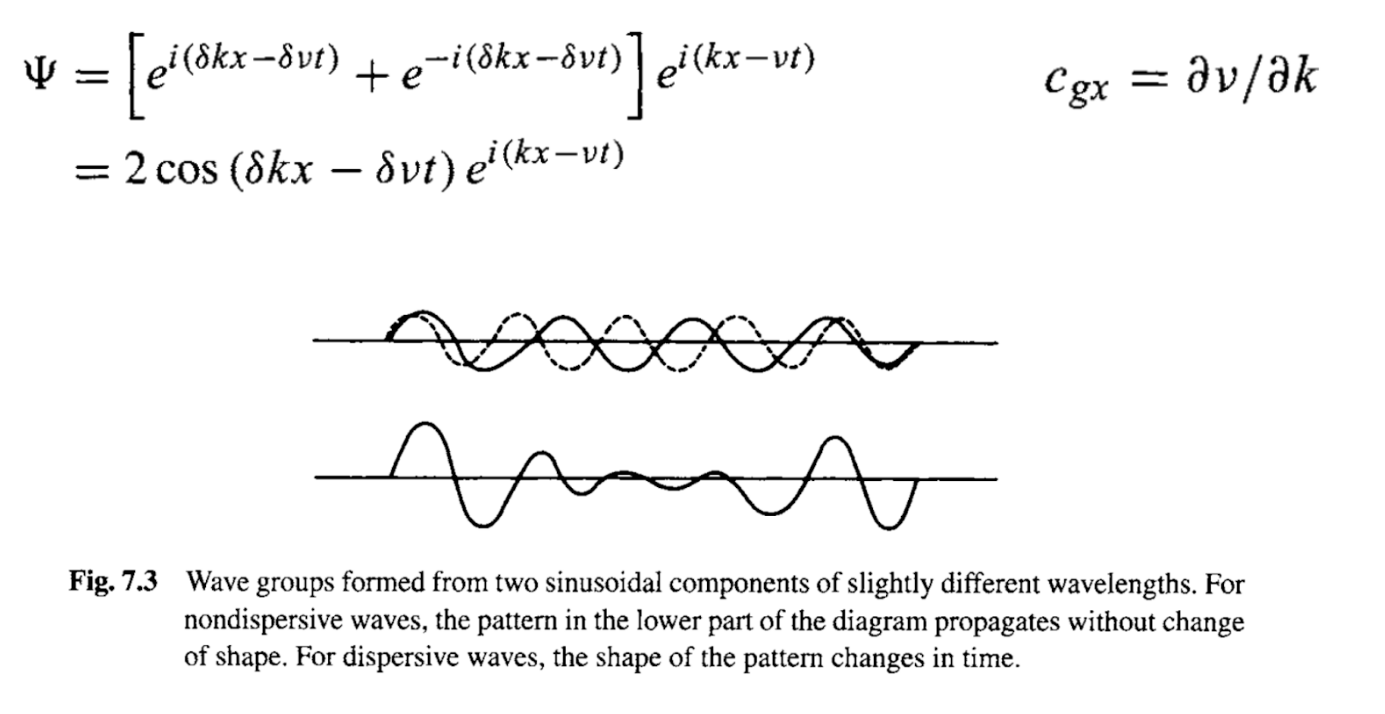

With all of the above in mind, we have decided to include a sample of the wave function code, the entire foundation and layout of which was initially coded by our professor, Dr. Robel, in his Earth Systems Modeling class. While the initial context of the problem was that of a seismic wave traveling through different parts of Earth’s interior (unlike our shallow water wave demonstration, which will be covered later), the properties of the code remain similar. The only changes that have occurred was the actual coding of Figures 1 & 2 of this section ("Progression in the Change of Alpha over Distance" - Figure 1 & "Simplified Seismic Wave Solution" - Figure 2) and some minor edits elsewhere.

#### WaveEqnBase Demo
In this section, the problem requires a model designed to illustrate the changing motions of the wave as it moves through a portion of the Earth’s interior at a lower speed (lithosphere) before passing into a deeper section of the Earth at a higher speed (mantle). For this, the variable lambda1 represents lithosphere wave speed, while lambda2 represents mantle wave speed. These positional variables (L, nx, x) are used to generate the x-dimension and step for the grid, while the time variables (tf, nt, dt) all are used to generate the time step and dimension for our model grid. Other variables such as xt and lam are used to generate the changing wave speed from one half of the matrix to the other.

The matrix u is the array field we will modify in our model in order to generate an array of values that simulate the motion of the wave across our grid. You’ll note that the code modifies the matrix to make it tridiagonal; this type of a matrix is used to generate the mathematical approximation of the wave function over time, as proven by this section of the notes from class posted below.

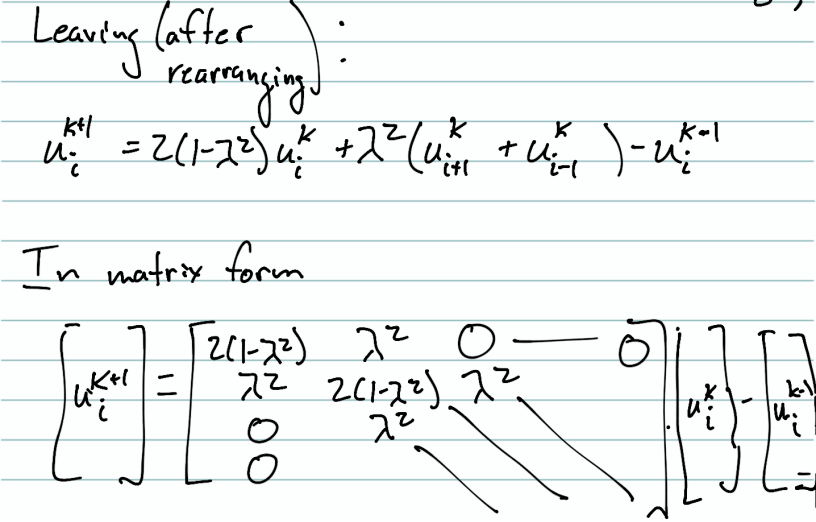
Specifically, we are using the matrix to generate the answer to the time-step 2 positions ahead of where the iteration variable k is (from k = 0 to k = maximum amount of time - 2) by multiplying it by the time-step 1 position ahead of k and subtracting the current time-step position of k. Based upon the lectures over the Wave Function we received during the semester, this in turn generates a stable, accurate method that outputs the answer to the wave function in the column equivalent to the time-step 2 positions ahead of the iteration variable k. We loop through the entire matrix (and therefore, the entire grid) to get a complete set of answers to the wave equation. To prevent any issues with stability, we made sure to adequately and proportionally reduce the dimensions to within computational limits, and prevented lambda from existing as too large of a value to be used. In addition, we set the matrix and grid boundaries to be reflective; this would simulate the gravity waves running into the barrier representing the transition from the ground to the atmosphere, where the waves would get reflected from this barrier back into the 1D bisection of the system. This goes hand-in-hand with our assumption that despite only obtaining a 1D bisection of the earth’s interior, our system remains isolated, closed, and without any loss in momentum of the wave due to external and internal forces like friction not already available within the problem.

#### Case 1 and Case 2
For the other two cases, the process was extremely similar, with the only changes coming in how lambda was calculated and what the reflective boundary represents. Because we were attempting to model shallow-water gravity waves within an ocean basin, we needed to utilize the equation found in Chapter 7, identified as 7.22 and 7.23 and shown below. The explanation behind how this formula was achieved is explained in greater detail within the textbook PDF link attached to the github repository and embedded within this notebook.

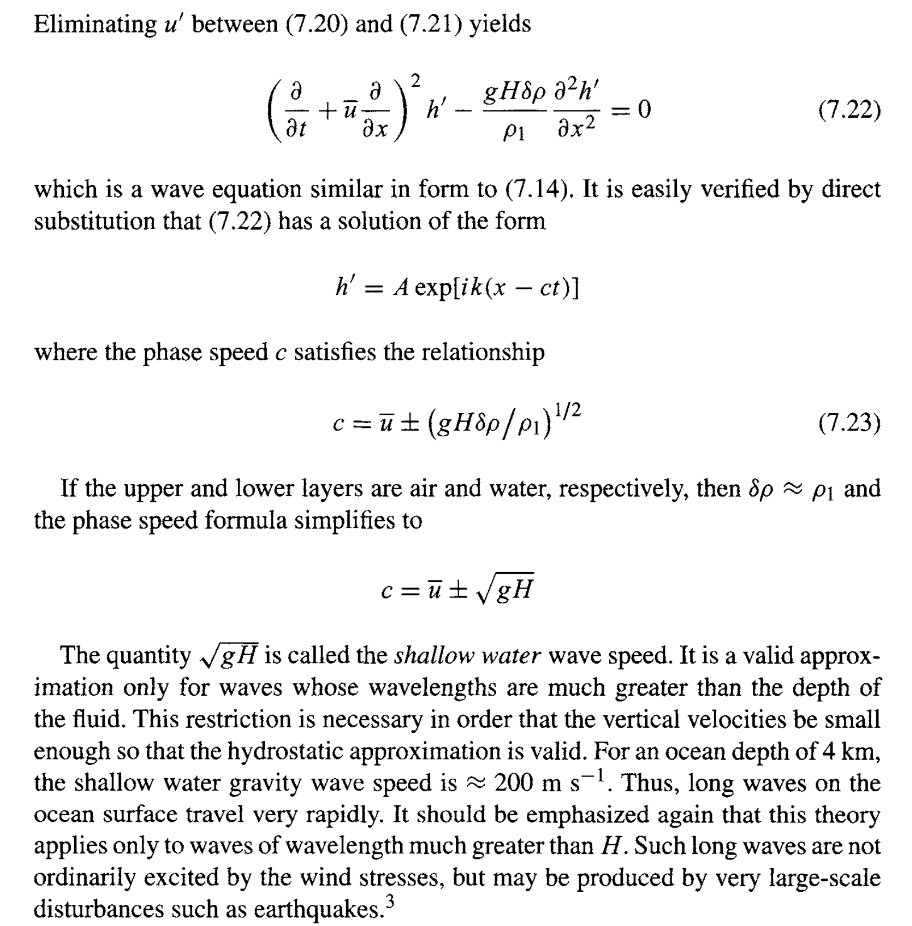
With the assumption that what we are simulating for Case 1 and Case 2 is that of a shallow wave moving over water of a depth H for Case 1 and a changing depth H(x) for Case 2, we can utilize the above snippet of the textbook to make the assumption of the wave phase speed observed in the code itself. With c# representing the new value for lambda depending on the situation, we utilized a constant wave speed value in Case 1 and a changing wave speed based upon the cosine function for Case 2. Like in the “Simplified Seismic Wave Solution”, we opted for reflective boundaries to represent an impenetrable barrier - in these two cases it is with landmasses, which serve as monolithic blocks to divert the energy of the wave back into the simulation.

# Numerical Methods

For all three of the previously-described sections [WaveEqnBase Demo, Case 1/Constant lambda, Case 2/Changing lambda], we are utilizing the 2-step process outlined in the class notes (uploaded to the Github as “Wave equation + example.pdf”). First, we develop u by discretizing the second derivative of u in both the x and the t dimensions, establishing our u_xx and our u_tt through the assumption of the formula below for x and t.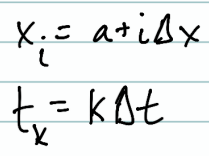
After this, we make use of the centered difference formulas for both terms, eventually resulting in the displayed formula underneath the WaveEqnBase Demo Matrix formula explanation shown earlier. We purposely coded the 3 scenarios we opted to look at (the seismic wave as a reference code section, a simulation with a constant shallow water wave speed, and a method used to generate a wave speed value dependent on where in the grid the wave is) to check for changes in lambda over time and to make sure that the centered difference formula was outputting the correct answer. While each situation we coded for has a different result, each situation did result in an output that was handled by the 2-step process outlined here without serious issues or incorrect outputs, even if Case 2 appears unusual with respect to the other 2 simulations. This accuracy made choosing this process an easy one.

# Results

As previously stated, we ran three different types of simulations; one to confirm the results of the demo code done in class, and two more that tested whether changing the wave phase speed ultimately resulted in any notable changes to the flow of the waves, either in the normal westerly direction in the mid-latitudes, or in the unusual easterly flow that can sometimes occur in this layer.

In a general sense, the results for both the “Simplified Seismic Wave Solution” and Case 1 were not all that surprising. While it is notable that there is destructive interference that does develop over time in the seismic wave solution, these two results as a whole matched not only the previous results obtained in class from similar codes and thought processes but also matched the textbook’s depiction of the wave function with the given parameters. Case 1, in particular, emulated the displayed wave function from Chapter 7 quite well, with the two different lambda values causing a bit of a shift in the output in Figure 2. Ultimately these differences are not surprising when you consider that the seismic wave traverses through differences in the medium by which it travels, while Case 1 has a perfectly stable shallow-water gravity wave that stays in a worldwide ocean of constant depth. This remained true regardless of time step, grid size, or model parameters, though different methods were tougher to come by. If proven accurate and with the right restrictions, however; there is nothing that would prove that such a method would display something different.

Case 2 was the more interesting of the three modeled simulations, in this case. The changing lambda over space-time did result in an interesting change with the wave function - the amplitude of the wave actually showed a marked increase as the function itself grew closer to “shore” and the H, or ocean depth, value decreased. This illustrates something we are quite familiar with; waves decrease in forward motion and increase in apparent height as the distance between the ocean surface and ocean seafloor decreases. This occurred regardless of time step, grid size, model parameter, or function utilized to generate the ocean depth value, though it should be noted that if the difference in the H(x) maximum and minimum values is too great, the graph becomes nearly unreadable due to the sheer wave height differential that results. In future evolutions of this code, this is one area that could be easily improved, along with providing easier ways to modify the code that do not cause it to run into stability issues, which was a source for concern in Case 2. By comparison, the seismic wave and Case 1 were much less troublesome, and this is likely due to the reflective boundaries allowing the wave energy to not convulse as much as it does in Case 2.

Overall, our results did match our expectations for the propagation of the wave function over time, even if it may have appeared to be off at some points. While there is still definitely room for improvement of our model (notably, making it work without reflective boundaries to get the true sense of continuous gravity wave motion, especially in modeling shallow waters worldwide), the results do match theory and therefore cannot be too unreasonable of an answer. We look forward to seeing what changes need to be done to expand our model’s usefulness by factoring in more real-life processes, such as shifts in gravitational pull, friction, and changes in the wind speed, even if the latter was messed with several times just to see what result would pop out. Other small-scale factors such as waterspouts, increased evaporation rates, and other shifts in depth or flow that are too localized to be captured by the planetary model we have designed would be intriguing to investigate independently as well. However, we will leave such investigations to more capable hands or as a project for another time, and we look forward to greater ocean-atmospheric dynamical studies in the near future.

# Coding Section

### Necessary Imports

In [1398]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
from scipy.sparse import spdiags

## WaveEqnDemo Base
### Created by: Dr. Robel
### Minor Edits by: Carson Clements, Kate Breeden

### Parameters to Consider

In [1399]:
alpha1 = 1
alpha2 = 2
L = 30.0
xt = 15
tf = 100.0

### Assembling the Grid

In [1400]:
nx = 301
nt = 10000

x = np.linspace(0,L,nx) # Need L to evenly divide into nx
t = np.linspace(0,tf,nt) # Need tf to evenly divide into nt

dt = t[1]-t[0]
dx = x[1]-x[0]

lam = np.zeros(nx)
lam[x<=xt] = alpha1*dt/dx
lam[x>xt] = alpha2*dt/dx

### Pre-Allocating Variables and Initial Conditions

In [1401]:
u = np.nan*np.ones([nx,nt])
u[:,0] = np.exp(-(x**2) / 2)
u[:,1] = np.exp(-(x**2) / 2)

### Making the Tridiagonal Matrix

In [1402]:
data = np.array([(lam**2)*np.ones(nx), 2*(1-lam**2)*np.ones(nx), (lam**2)*np.ones(nx)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, nx, nx).toarray()

### Establishing Boundary Conditions

In [1403]:
#Reflective BC
M[0,0] = 2-lam[0]**2
M[-1,-1] = 2-lam[-1]**2

### Solving the Equation

In [1404]:
for k in np.arange(nt-2):
    u[:,k+2] = np.matmul(M,u[:,k+1]) - u[:,k]

# Creating the Wave Function
## Case 1 - c (or lambda) is Constant in Space

### Parameters to (re)Consider

In [1405]:
#alpha = u + or - sqrt(gravity * Height or Mean Depth of Lower Layer)
# Have to modify above equation to fit two alpha values'
# Assume perturbation values can be neglected because H >> h'
# Assume two layers we're dealing with are water (bottom) and air (top)
# h' = A*e^(ik[x-(u+sqrt(gH))t]) What is A? i & k are time and place step, respectively
# Remember: default equation is partial 2nd time (t) derivative of h' + c^2 * partial 2nd space (x) derivative of h' = 0
g = 9.81 #m/(s^2) - average gravitational acceleration
H = 3700 #m - also the average depth of the ocean
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
# The following are based upon the assumption that the upper layer is air and the lower layer is water
c1 = (u_Line_Stable + ma.sqrt(g*H))/6000
c2 = (u_Line_Reverse - ma.sqrt(g*H))/6000
# The above values have been divided by 6000 to allot for shrinking of the domain
x_Scale = 27.0 #28385000 #m - "circumference" of the Earth at 45 degrees latitude (mid-latitudes)
    # originally shortened to 2838.5 proportionally, modified to 2700 to divide evenly into t_Total
    # Represents a 10km (10000m) space scale
t_Scale = 864.0 #1209600 #s - amount of time for an individual air parcel to circumnavigate the globe at 45N (roughly 2 weeks)
    # total time divided by num of days (14) to get 86400 proportionally
    #60 #s -> 1-minute time scale
# both of the above values have been divided by 100 to reduce computational stress

### Assembling a New Grid

In [1406]:
x_Total = 271
t_Total = 8641

x_Array = np.linspace(0,x_Scale,x_Total) # Evenly distanced values of x
t_Array = np.linspace(0,t_Scale,t_Total) # Evenly distanced values of t

delta_t = t_Array[1]-t_Array[0] #time step
delta_x = x_Array[1]-x_Array[0] #space step

lam_Stable = np.zeros(x_Total) #Creating the stable c/alpha case
for i in np.arange(x_Total):
    lam_Stable[i] = c1*delta_t/delta_x #Establishing the stable c/alpha case

lam_Reverse = np.zeros(x_Total) #Creating the stable c/alpha case with opposite flow
for i in np.arange(x_Total):
    lam_Reverse[i] = c2*delta_t/delta_x #Establishing the above case

### Creating the two Matrices and Allocating for Space Within Them

In [1407]:
stable_u = np.nan*np.ones([x_Total,t_Total])
stable_u[:,0] = np.exp(-(x_Array**2) / 2)
stable_u[:,1] = np.exp(-(x_Array**2) / 2)

reverse_u = np.nan*np.ones([x_Total,t_Total])
reverse_u[:,0] = np.exp(-(x_Array**2) / 2)
reverse_u[:,1] = np.exp(-(x_Array**2) / 2)

### Modifying the Matrices to Make Them Tridiagonal

In [1408]:
# Westerlies in mid-latitudes
stable_Data = np.array([(lam_Stable**2)*np.ones(x_Total), 2*(1-lam_Stable**2)*np.ones(x_Total), (lam_Stable**2)*np.ones(x_Total)])
stable_Diags = np.array([-1, 0, 1])
stable_M = spdiags(stable_Data, stable_Diags, x_Total, x_Total).toarray()

# Now for the Other Option (aka westerlies are now easterlies)
reverse_Data = np.array([(lam_Reverse**2)*np.ones(x_Total), 2*(1-lam_Reverse**2)*np.ones(x_Total), (lam_Reverse**2)*np.ones(x_Total)])
reverse_Diags = np.array([-1, 0, 1])
reverse_M = spdiags(reverse_Data, reverse_Diags, x_Total, x_Total).toarray()

### Determining Appropriate Boundary Conditions

In [1409]:
#Reflective BC
stable_M[0,0] = 2-lam_Stable[0]**2
stable_M[-1,-1] = 2-lam_Stable[-1]**2

#Reflective BC
reverse_M[0,0] = 2-lam_Reverse[0]**2
reverse_M[-1,-1] = 2-lam_Reverse[-1]**2

### Solving the Wave Equation

In [1410]:
# First up, the normal case
for k in np.arange(t_Total-2):
    stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]

# And now the reverse!
for k in np.arange(t_Total-2):
    reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]

# Wave Function Part II
## Case 2 - c = c(x) [lambda = lambda(x)]

### Re-evaluating Parameters

In [1411]:
#H is now a function of x, which means c = c(x) and alpha = alpha(x) for both forward and reverse cases
#The rest of the parameters are still unchanged from Case 1 and can be recalled as is, though will be restated here
g = 9.81 #m/(s^2) - average gravitational acceleration
H = np.zeros(x_Total)
for i in np.arange(x_Total):
    H[i] = 10000*np.cos(i/190) #H is now a function of x in space, which means c = c(x) and alpha = alpha(x) 
                              #for both forward and reverse cases - simulates Atlantic/Pacific crossing
    if H[i] < 0:
        H[i] = 0
#The rest of the parameters are still unchanged from Case 1 and can be recalled as is, though will be restated here
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
x_Total = 271
t_Total = 8641
c3 = np.zeros(x_Total)
c4 = np.zeros(x_Total)
for i in np.arange(x_Total):
    c3[i] = (u_Line_Stable + ma.sqrt(g*H[i]))/6000
    c4[i] = (u_Line_Reverse - ma.sqrt(g*H[i]))/6000
    # The above values have been divided by 6000 to allot for shrinking of the domain
x_Scale = 27.0 #28385000 #m - "circumference" of the Earth at 45 degrees latitude (mid-latitudes)
    # originally shortened to 2838.5 proportionally, modified to 2700 to divide evenly into t_Total
    # Represents a 10km (10000m) space scale
t_Scale = 864.0 #1209600 #s - amount of time for an individual air parcel to circumnavigate the globe at 45N (roughly 2 weeks)
    # total time divided by num of days (14) to get 86400 proportionally
    #60 #s -> 1-minute time scale
# both of the above values have been divided by 100 to reduce computational stress

### Re-establishing the Grid

In [1412]:
x_Total = 271
t_Total = 8641
    
x_Array = np.linspace(0,x_Scale,x_Total) # Evenly distanced values of x
t_Array = np.linspace(0,t_Scale,t_Total) # Evenly distanced values of t

delta_t = t_Array[1]-t_Array[0] #time step
delta_x = x_Array[1]-x_Array[0] #space step

lam_Changing = np.zeros(x_Total) #Creating the stable c/alpha case
for i in np.arange(x_Total):
    lam_Changing[i] = c3[i]*delta_t/delta_x #Establishing the stable c/alpha case

lam_Changing_Reverse = np.zeros(x_Total) #Creating the stable c/alpha case with opposite flow
for i in np.arange(x_Total):
    lam_Changing_Reverse[i] = c4[i]*delta_t/delta_x #Establishing the above case

### Generating Two New Matrices to Account for Changing alpha

In [1413]:
changing_u = np.nan*np.ones([x_Total,t_Total])
changing_u[:,0] = np.exp(-(x_Array**2) / 2)
changing_u[:,1] = np.exp(-(x_Array**2) / 2)

changing_reverse_u = np.nan*np.ones([x_Total,t_Total])
changing_reverse_u[:,0] = np.exp(-(x_Array**2) / 2)
changing_reverse_u[:,1] = np.exp(-(x_Array**2) / 2)

### Turning the Default Matrices into Tridiagonal Matrices

In [1414]:
# Westerlies in mid-latitudes
changing_Data = np.array([(lam_Changing**2)*np.ones(x_Total), 2*(1-lam_Changing**2)*np.ones(x_Total), (lam_Changing**2)*np.ones(x_Total)])
# np.array([(lam_Stable**2)*np.ones(x_Total), 2*(1-lam_Stable**2)*np.ones(x_Total), (lam_Stable**2)*np.ones(x_Total)])
changing_Diags = np.array([-1, 0, 1])
changing_M = spdiags(changing_Data, changing_Diags, x_Total, x_Total).toarray()

# Now for the Other Option (aka westerlies are now easterlies)
changing_reverse_Data = np.array([(lam_Changing_Reverse**2)*np.ones(x_Total), 2*(1-lam_Changing_Reverse**2)*np.ones(x_Total), (lam_Changing_Reverse**2)*np.ones(x_Total)])
changing_reverse_Diags = np.array([-1, 0, 1])
changing_reverse_M = spdiags(changing_reverse_Data, changing_reverse_Diags, x_Total, x_Total).toarray()

### Boundary Conditions

In [1415]:
#Reflective BC
changing_M[0,0] = 2-lam_Changing[0]**2
changing_M[-1,-1] = 2-lam_Changing[-1]**2

#Reflective BC
changing_reverse_M[0,0] = 2-lam_Changing[0]**2
changing_reverse_M[-1,-1] = 2-lam_Changing[-1]**2

### Solving the Wave Equation when c is a function of x

In [1416]:
# First up, the normal case
for k in np.arange(t_Total-2):
    changing_u[:,k+2] = np.matmul(changing_M,changing_u[:,k+1]) - changing_u[:,k]
    
# And now the reverse!
for k in np.arange(t_Total-2):
    changing_reverse_u[:,k+2] = np.matmul(changing_reverse_M,changing_reverse_u[:,k+1]) - changing_reverse_u[:,k]

# Figures
### Figures 1-7: Plotting Our Solutions

Text(0, 0.5, 'Value of lambda')

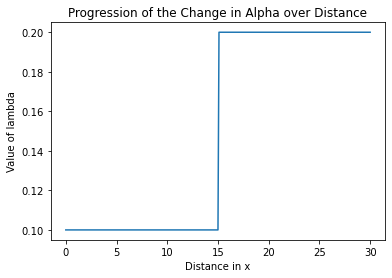

In [1417]:
plt.figure(1)
plt.title("Progression of the Change in Alpha over Distance")
plt.plot(x,lam)
plt.xlabel('Distance in x (in 1000s km)')
plt.ylabel('Value of lambda') #Unitless

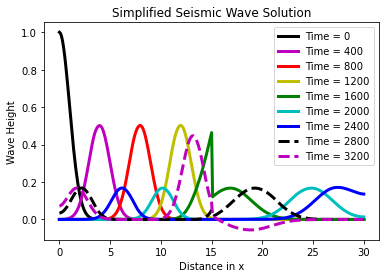

In [1418]:
plt.figure(2)
plt.title("Simplified Seismic Wave Solution")
plt.plot(x,u[:,0], 'k', label='Time = 0', linewidth=3)
plt.plot(x,u[:,400], 'm', label='Time = 400', linewidth=3)
plt.plot(x,u[:,800], 'r', label='Time = 800', linewidth=3)
plt.plot(x,u[:,1200], 'y', label='Time = 1200', linewidth=3)
plt.plot(x,u[:,1600], 'g', label='Time = 1600', linewidth=3)
plt.plot(x,u[:,2000], 'c', label='Time = 2000', linewidth=3)
plt.plot(x,u[:,2400], 'b', label='Time = 2400', linewidth=3)
plt.plot(x,u[:,2800], 'k--', label='Time = 2800', linewidth=3)
plt.plot(x,u[:,3200], 'm--', label='Time = 3200', linewidth=3)
plt.xlabel('Distance in x (in 1000s km)')
plt.ylabel('Wave Height') #Unitless due to scale
plt.legend()

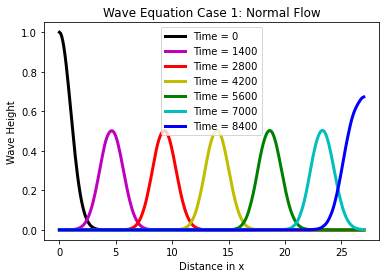

In [1419]:
#Normal Case is First
plt.figure(3)
plt.title("Wave Equation Case 1: Normal Flow")
plt.plot(x_Array,stable_u[:,0], 'k', label='Time = 0', linewidth=3)
plt.plot(x_Array,stable_u[:,1400], 'm', label='Time = 1400', linewidth=3)
plt.plot(x_Array,stable_u[:,2800], 'r', label='Time = 2800', linewidth=3)
plt.plot(x_Array,stable_u[:,4200], 'y', label='Time = 4200', linewidth=3)
plt.plot(x_Array,stable_u[:,5600], 'g', label='Time = 5600', linewidth=3)
plt.plot(x_Array,stable_u[:,7000], 'c', label='Time = 7000', linewidth=3)
plt.plot(x_Array,stable_u[:,8400], 'b', label='Time = 8400', linewidth=3)
plt.xlabel('Distance in x (in 1000s km)');
plt.ylabel('Wave Height'); #Unitless, Proportional Value
plt.legend()

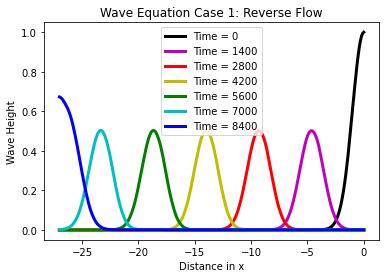

In [1420]:
#Reverse Case
plt.figure(4)
plt.title("Wave Equation Case 1: Reverse Flow")
plt.plot(-x_Array,reverse_u[:,0], 'k', label='Time = 0', linewidth=3)
plt.plot(-x_Array,reverse_u[:,1400], 'm', label='Time = 1400', linewidth=3)
plt.plot(-x_Array,reverse_u[:,2800], 'r', label='Time = 2800', linewidth=3)
plt.plot(-x_Array,reverse_u[:,4200], 'y', label='Time = 4200', linewidth=3)
plt.plot(-x_Array,reverse_u[:,5600], 'g', label='Time = 5600', linewidth=3)
plt.plot(-x_Array,reverse_u[:,7000], 'c', label='Time = 7000', linewidth=3)
plt.plot(-x_Array,reverse_u[:,8400], 'b', label='Time = 8400', linewidth=3)
plt.xlabel('Distance in x (in 1000s km)');
plt.ylabel('Wave Height'); #Unitless, Proportional Value
plt.legend()

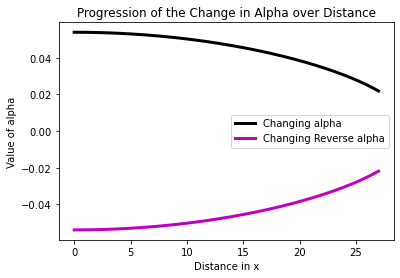

In [1421]:
plt.figure(5)
plt.title("Progression of the Change in Alpha over Distance")
plt.plot(x_Array,lam_Changing, 'k', label='Changing alpha', linewidth=3)
plt.plot(x_Array,lam_Changing_Reverse, 'm', label='Changing Reverse alpha', linewidth=3)
plt.xlabel('Distance in x (in 1000s km)')
plt.ylabel('Value of alpha') 
plt.legend()

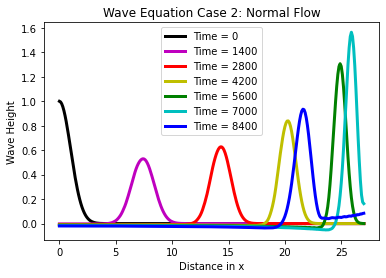

In [1422]:
#Normal Case is First
plt.figure(6)
plt.title("Wave Equation Case 2: Normal Flow")
plt.plot(x_Array,changing_u[:,0], 'k', label='Time = 0', linewidth=3)
plt.plot(x_Array,changing_u[:,1400], 'm', label='Time = 1400', linewidth=3)
plt.plot(x_Array,changing_u[:,2800], 'r', label='Time = 2800', linewidth=3)
plt.plot(x_Array,changing_u[:,4200], 'y', label='Time = 4200', linewidth=3)
plt.plot(x_Array,changing_u[:,5600], 'g', label='Time = 5600', linewidth=3)
plt.plot(x_Array,changing_u[:,7000], 'c', label='Time = 7000', linewidth=3)
plt.plot(x_Array,changing_u[:,8400], 'b', label='Time = 8400', linewidth=3)
plt.xlabel('Distance in x (in 1000s km)');
plt.ylabel('Wave Height'); #Unitless, Proportional Value
plt.legend()

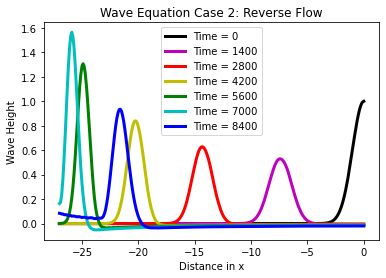

In [1423]:
#Reverse Case
plt.figure(7)
plt.title("Wave Equation Case 2: Reverse Flow")
plt.plot(-x_Array,changing_reverse_u[:,0], 'k', label='Time = 0', linewidth=3)
plt.plot(-x_Array,changing_reverse_u[:,1400], 'm', label='Time = 1400', linewidth=3)
plt.plot(-x_Array,changing_reverse_u[:,2800], 'r', label='Time = 2800', linewidth=3)
plt.plot(-x_Array,changing_reverse_u[:,4200], 'y', label='Time = 4200', linewidth=3)
plt.plot(-x_Array,changing_reverse_u[:,5600], 'g', label='Time = 5600', linewidth=3)
plt.plot(-x_Array,changing_reverse_u[:,7000], 'c', label='Time = 7000', linewidth=3)
plt.plot(-x_Array,changing_reverse_u[:,8400], 'b', label='Time = 8400', linewidth=3)
plt.xlabel('Distance in x (in 1000s km)');
plt.ylabel('Wave Height'); #Unitless, Proportional Value
plt.legend()

### Video Walkthrough: 
## References:
“Chapter 7 Atmospheric Oscillations: Linear Perturbation Theory.” International Geophysics, Academic Press, 2 Sept. 2007, https://www.sciencedirect.com/science/article/pii/S007461420480041X.

Robel, Dr. Alexander (16 November 2022) WaveEqnDemo_2022 (Version 1.0) [Source Code]. Jupyter Notebook/Github/Canvas.

#### Thank you!